In [1]:
import pandas as pd 

 ### Pandas 
Pandas is an open source Python library, primarily used to analyze and manipulate data.

In [2]:
hour = pd.read_csv('hour.csv')
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


read_csv() = Reads the file data <br>
pd.head() = Returns the first N rows (5 by default).

In [3]:
print(f"Mean of Total Count: {hour['count'].mean()}")
print(f"Median of Total Count: {hour['count'].median()}")
print(f"Maximum Registered : {hour['registered'].max()}")
print(f"Minimum Registered : {hour['registered'].min()}")
print(f"Standard Deviation of Total Count: {hour['count'].std()}")

Mean of Total Count: 189.46308763450142
Median of Total Count: 142.0
Maximum Registered : 886
Minimum Registered : 0
Standard Deviation of Total Count: 181.38759909186476


## Summary Statistics 
### Simple calculations which help us understand the data closely and understand the nature of it. All the functions are performed through pandas.
Mean - Sum of all values divided by total no. of values (Average)   .mean() <br>
Median - The middle value of a series (In case of even numbers, the middle two are added and divided by two)  .median() <br>
Max - Maximum Value within the range .max() <br>
Min - Minimum value within the range .min() <br>
Standard Deviation - Shows how far is the data from its mean value. Ex : +- 181  .std() <br>


In [4]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### .describe() 
* Checks the summary statistics for all the values in the data.<br>
* Gives an overview about redundancies and assessing plausibility of the data. <br>
25%['count'] = Means, 25% of the hours in dataset had a value of 40  users or below. <br>
50%['count'] = Means, 50% of the hours in dataset had a value of 142 users or below. <br>
75%['count'] = Means, 75% of the hours in dataset had a value of 281 users or below. <br>

## Analyzing Subsets of the Data
After Summary Statistics, It's important to verify if the assesment is correct. <br>
For Example : If the user count during the night is really low and i want to decrease the price of bicycles, I must check the data only for that time period and confirm it.


## Nighttime Data

In [5]:
print(hour.loc[3,'count'])

13


### .loc() method
Whenever we want to have a subset from the entire data, we use the loc() method, by using squared brackets [] where, [<row>, <column>] <br>
In the above example, we are indicating that we want to select row from our data and column count. <br>
Pandas also use zero-based indexing (<b>NOTE</b>)

In [6]:
print(hour.loc[0:10, 'count'])

0     16
1     40
2     32
3     13
4      1
5      1
6      2
7      3
8      8
9     14
10    36
Name: count, dtype: int64


Incase we want multiple rows/columns we can use <b>:</b> to specify the range. <br>
Instead of printing all the data, when we print only a few rows / subsets. The process is called <b>"subsetting"</b>

In [7]:
print(f"Mean of registered users between 1-5AM : {hour.loc[hour['hr']<5, 'registered'].mean()}")

Mean of registered users between 1-5AM : 20.7881427367238


We can also specify a logical condition for which we want the row to be decided.

In [8]:
print(f"Average number of riders in midnight (1-4AM) in winters: {hour.loc[(hour['hr'] < 5) & (hour['temp'] < 0.50), 'count'].mean()}")
print(f"Average number of riders in midnight (1-4AM) in summers: {hour.loc[(hour['hr'] < 5) & (hour['temp'] > 0.50), 'count'].mean()}")

Average number of riders in midnight (1-4AM) in winters: 19.521104742053154
Average number of riders in midnight (1-4AM) in summers: 33.639322916666664


With .loc() we can also specify multiple logical conditions separated by an <b>&</b> character.

In [9]:
print(f"Average number of riders during warm weather and high humidity :  {hour.loc[(hour['temp'] > 0.5) | (hour['hum'] > 0.5), 'count'].mean()}")

Average number of riders during warm weather and high humidity :  193.36764103264582


Logical conditions combined with <b>|</b> (OR)

## Seasonal Data

### groupby() -
This function is used to group data together and use for computation.<br>
For Example : If i want to group together seasons and find the average count of riders in all seasons. <br>
1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall

In [10]:
print(hour.groupby(['season'])['count'].mean())

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


<b>groupby()</b> function can also be performed on multiple columns. For example - Where, 0 = Non-Holiday and 1 = Holiday <br>
Here, I have specified two columns to group on season and holiday.

In [11]:
print(hour.groupby(['season', 'holiday'])['count'].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


## Visualizing Data using 'matplotlib'
### What is matplotlib?
Matplotlib is a comprehensive python library used for generating static, animated, interactive visualizations.<br>

# Drawing and displaying a simple plot

In [12]:
import matplotlib.pyplot as plt

# Creating a 'Scatter Plot'

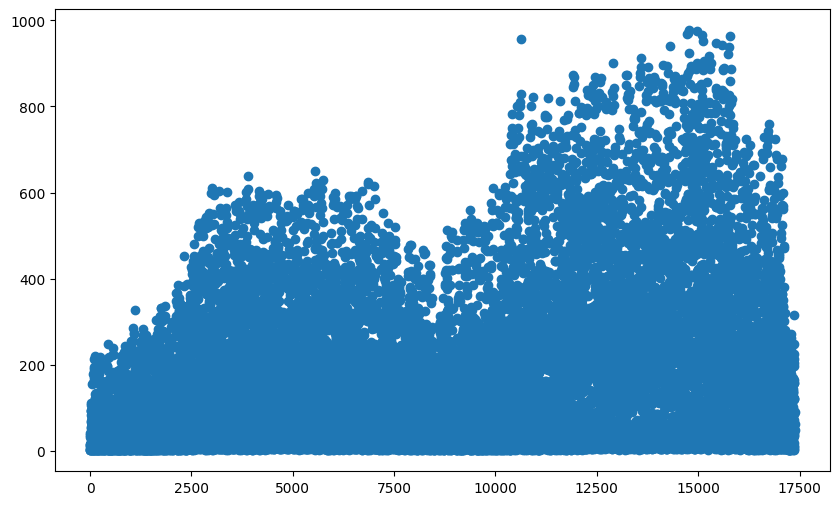

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.show()

In [14]:
fig = plt.figure(figsize = (2,2), facecolor = 'lightskyblue') #Here, figsize(<width>, <height>)

plt.show()

<Figure size 200x200 with 0 Axes>

## plt.figure()
The artistry happens on this figure! We can add more stuff on it as we add axes.

# Introduction to Axes (Subplots)
Axes are the gateway to visualization on figure. Once the axes are placed, it incorporates two axis on the figure on which methods like xlabel, ylabel, title and legends can be applied. <br>
fig, ax = plt.subplots() Returns a figure and an array of Axes. Adds a single Axes to a figure.



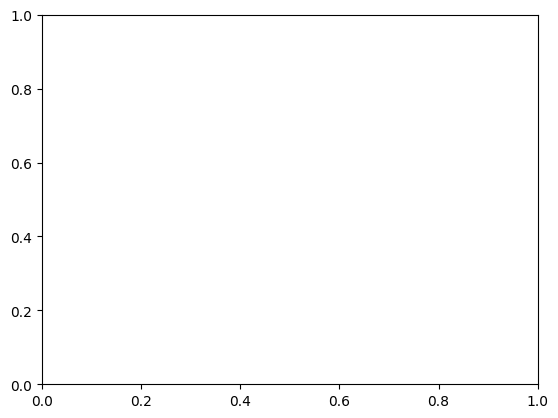

In [15]:
fig, ax = plt.subplots()
plt.show()

# Clarifying Plots with Titles and Labels

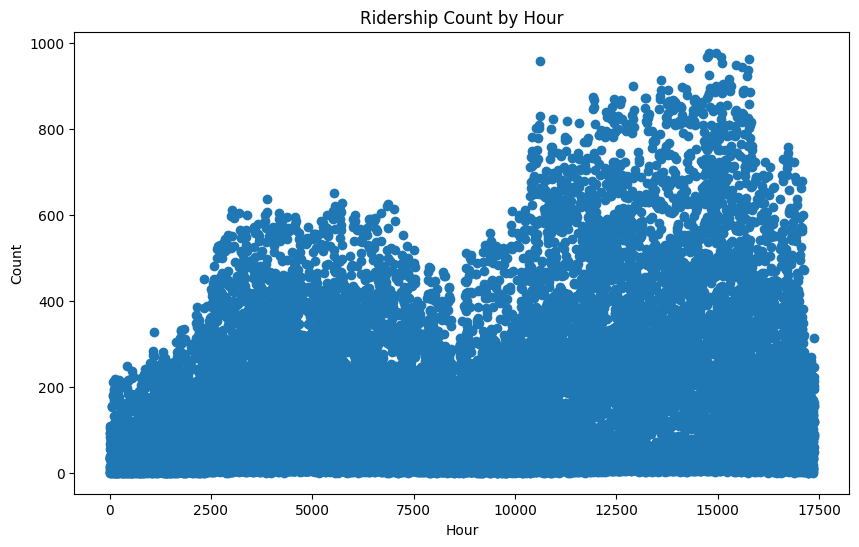

In [16]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

## Functions -
plt.xlabel() = It is used to add a label on the x-axis. <br>
plt.ylabel() = It is used to add a label on the y-axis. <br>
plt.title() = It is used to give a title to our plot. <br>


# Plotting 'Subsets' of Data
Since, the plot has alot of disturbance in it and we can only analyze it to a certain limit. To get sophisticated analysis, we need to learn how to plot the subsets of a data. For Example - 

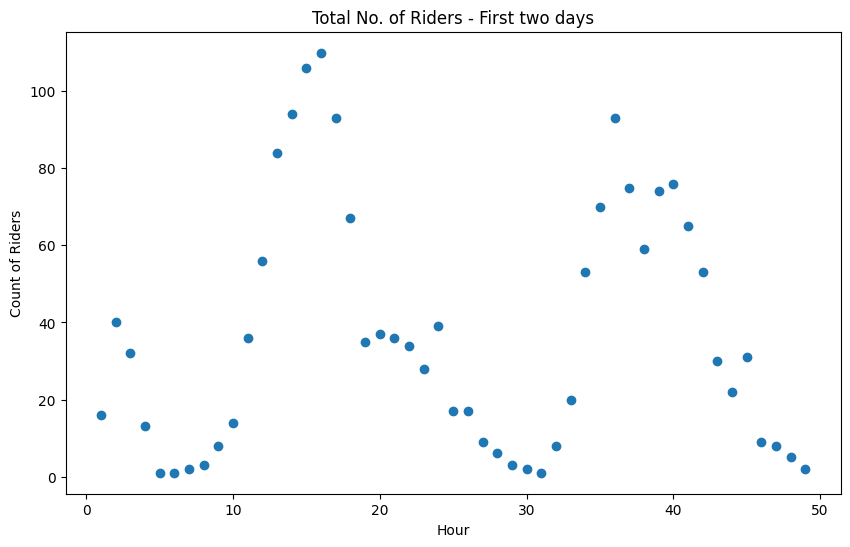

In [17]:
hour_first48 = hour.loc[0:48, :]
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count of Riders")
plt.title("Total No. of Riders - First two days")
plt.show()

By plotting two days, instead of two years. We avoid the problem of overlapping and data disturbance. We can now see the observations much more <b>clearly</b>. In a big data set, It is good to do both : <br>
1) Plot the entire data set once to understand the generic pattern <br>
2) Plot smaller observations to understand individual observations.

# Testing different types of PLOTS 
Scatter plots have various other functions to change the appearance of a plot. Here we will be changing the <b>color</b> and <b>marker</b> symbol.

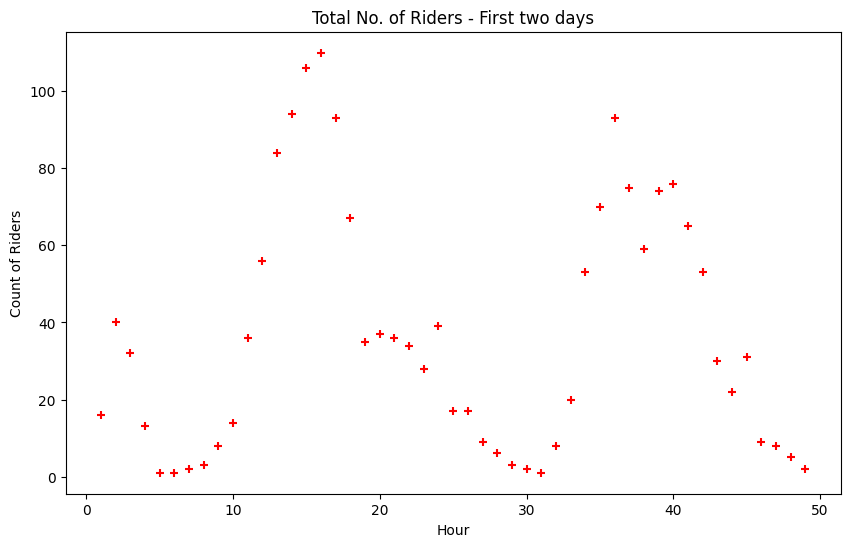

In [18]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'], c = 'red', marker = '+')
plt.xlabel("Hour")
plt.ylabel("Count of Riders")
plt.title("Total No. of Riders - First two days")
plt.show()

Scatter plots are not the only plots that we can draw. Now we will draw a <b>Line Plot</b>

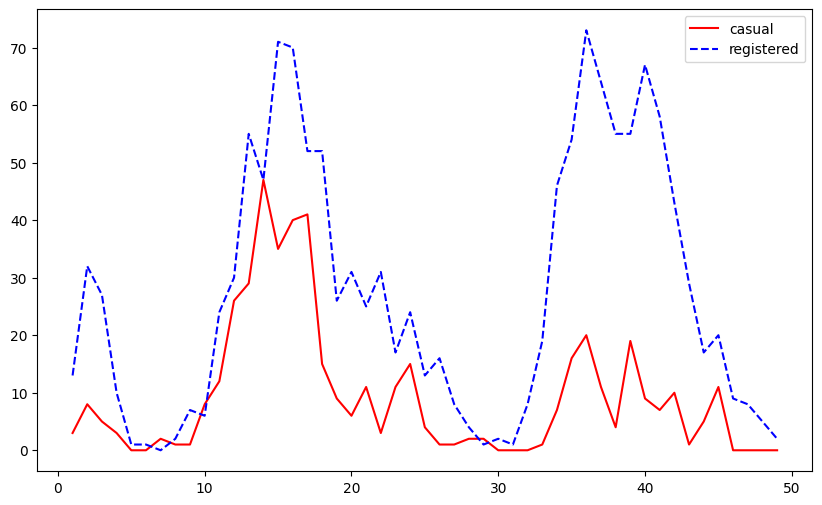

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot (hour_first48['instant'], hour_first48['casual'], c = 'red', label = 'casual', linestyle = '-')
ax.plot (hour_first48['instant'], hour_first48['registered'], c = 'blue', label = 'registered', linestyle = '--')
ax.legend()
plt.show()

## Line Plot
ax.plot() = This method allows us to plot a "Line Chart/Plot".
In this plot, I have drawn two lines to compare the count of Casual and Registered riders for two days by Hour.
ax.legend() = This method is fundamentally used to recognize data/series by associating labels and visual representations.

### New Parameters Used
<b>label</b> = Label can be seen on the legend key display. <br>
<b>linestyle</b> = Different line styles help in differentiating between different data plots and make it easier to read.



# Introducing 'Seaborn'
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [20]:
import seaborn as sns

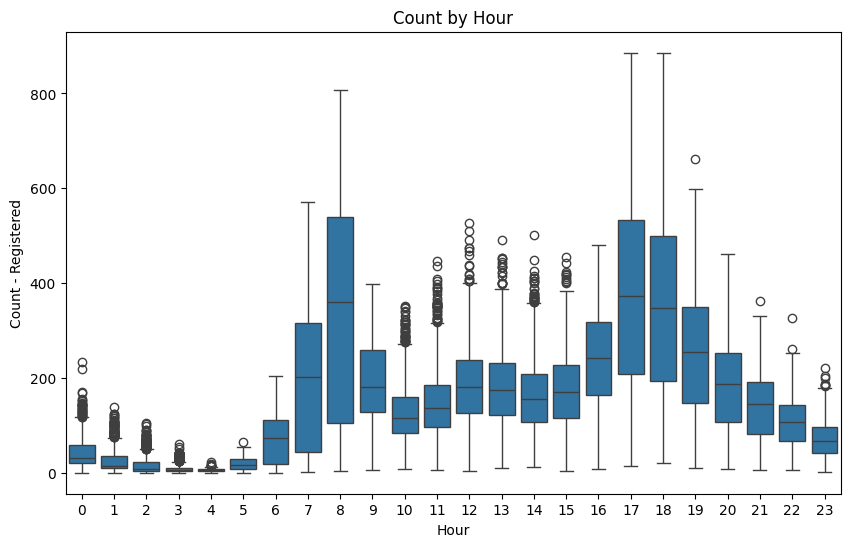

In [21]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(x = 'hr', y = 'registered', data = hour)
plt.xlabel("Hour")
plt.ylabel("Count - Registered")
plt.title("Count by Hour")
plt.show()

### Seaborn -
This package is based out of matplotlib, therefore it includes all the features of matplotlib plus more features that help create beautiful, informative plots such as a boxplot. (<b>boxplot()</b>)

### Understanding a box plot - 
It is a simple plot but gives a great deal of informationation.
The upper and lower boundaries of each rectangle represent the 75th and 25th percentiles of the plotted data, respectively.<br>
Horizontal line inside the rectangle represents the median (50th Percentile) <br>
Vertical lines extending from top and bottom of each rectangle represent the full range of all observations.

# Histogram

We are able to draw many other types of graphs as well. Next is a Histogram which comes with matplotlib only.

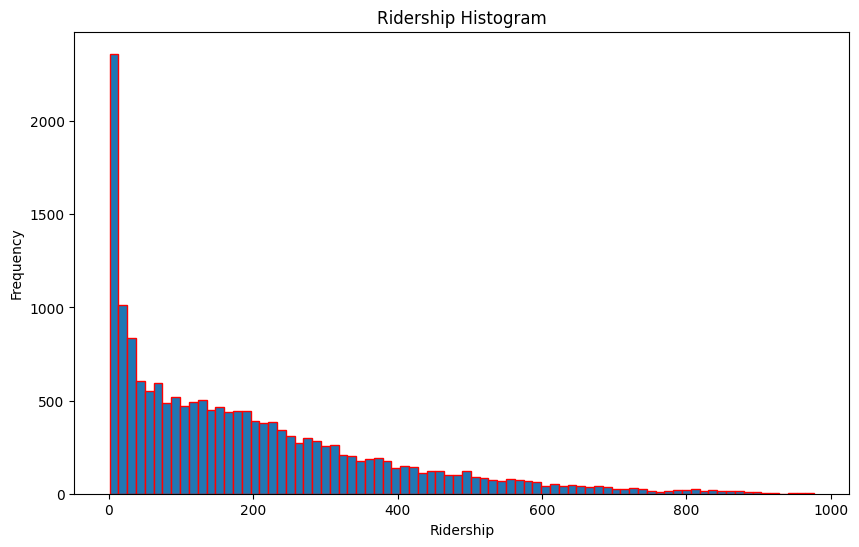

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(hour['count'], bins = 80, edgecolor = "red")
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

## Histogram
<b> Function Used </b> : ax.hist <br>
Arguments : <br>
<b>bins</b>: bins are the number of equal width intervals within which the data is divided. <br>
<b>edgecolor</b>: adds color to the edges of intervals, helping in easier differentiation between the intervals.

# Pair Plot
What is a <b>Pair Plot</b>
Ans. It draws every possible scatterplot for every possible pair of variables in your data.

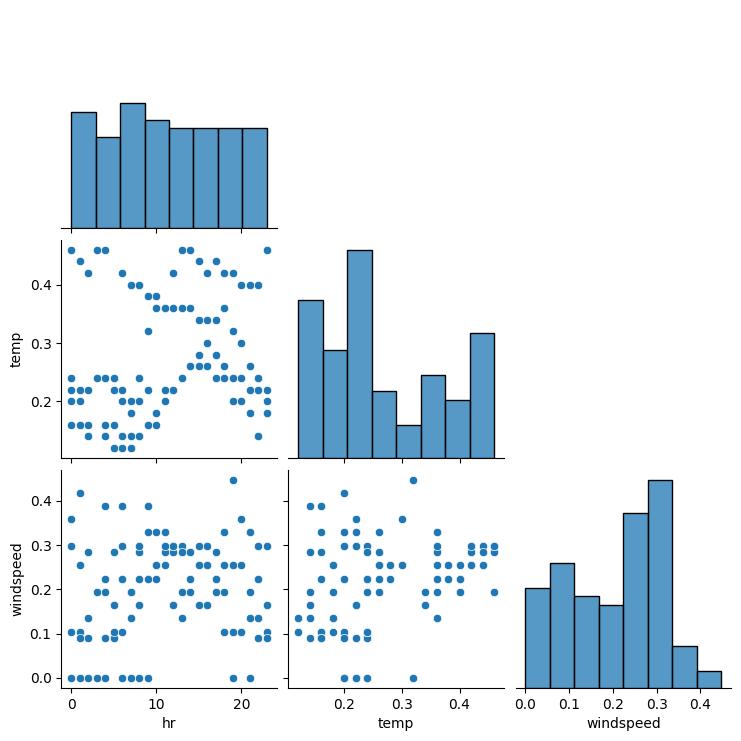

In [23]:
thevariables = ['hr', 'temp', 'windspeed']
hour_first100 = hour.loc[0:100, thevariables]
sns.pairplot(hour_first100, corner= True)
plt.show()

Pair Plotting creates a Histogram for each variable and a scatter plot for each vs each! <br>
Parameter, corner = True, Avoids plotting of duplicated plots ( A vs B / B vs A ) <br>

### Correlations (Intro)
Although these scatterplots do not help us understand any direct relation between the variables, Hypothetically a variable called snowfall could show a straight relationship with the temperature, depicting a strong and clear relationship between the two known as <b>Correlation</b>.

# Exploring Correlations

<i>Two variables</i> are correlated if, changes in one variable are associated with changes in another. <br>
<b> Types </b> of Correlations : <br>
1) <b>Positive Correlation</b> - Two variables are <i>positively correlated</i>, If the value of one variable tends to go up when value of the other goes up.<br>
2) <b>Negative Correlation</b> - Two variables are <i>negatively correlated</i>, If the value of one variable tends to go up when the value of other goes down.<br>

Example- 
1) The money spent on cat food is positively related with number of domesticated cats in a city. <br>
2) The money spent on winter coats is negatively related to the average temperature of a city.


# Calculating Correlations > 
Any statistical relationship between, whether casual or not between two variables or bivariate data.<br>
Statistical Measure, that describes the linear relationship between two variables ranging from <b>-1 to +1</b>.
Function : <b>corr()</b>

In [24]:
print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))

0.5066177004294635
-0.06988139105119355


### Correlation Coefficient - 
The number obtained is known as <b>The correlation coefficient</b>. There are many types of correlation coefficients, but by default corr() calculates <b><i>Pearson Correlation Coefficient.</i></b> <br>
If the correlation coefficient <b>r</b> is a positive number, our two variables are <b>POSITIVELY correlated</b> and if the variable <b>r</b> is a negative number, the two variables are <b>NEGATIVELY correlated</b>. <br>
When the coefficient is 0 or very close to 0, we say that the variables are <b>uncorrelated</b>.

# Understanding Strong and Weak correlations
## Theory >

Addition to noticing whether a correlation coefficient is positive, negative or 0. We must also pay attention to it's <i>magnitude/size</i>. When the correlation coefficient is large (far from 0 and close to either 1 or -1), the correlation is considered as <b><i>strong</i></b>.

Relationship between Fahrenheit and Celcius is positive. When one goes up, the other goes up.
and The relationship between casual riders and registered riders is also positive. <i>but</i> <br>

There is a qualitative difference, The relation between Celcius and Fahrenheit is <b><i>deterministic</i></b>. Knowing, One can calculate the temperature in Fahrenheit using the temperature in celcius. Hence a <b>perfect correlation</b> (r = <b>1</b>) <br>
In contrast, despite the relationship between casual and registered riders being positive, it is <i>not</i> deterministic. When two variables are positively correlated but <b>don't</b> have a deterministic relationship, we say that the relationship between the two variables has 'noise' or randomness. (Randomness may also be defined as unpredictability). <br>

Therefore, we can also think of the size of the correlation coefficient as a measure of the amount of randomness in the relationship between two variables. Larger correlation coefficient often corresponds to less randomness and a smaller correlation often corresponds to more randomness and less predictability. <br>

Similar to when r=1, it infers a perfect relationship, on the other hand when (correlatation coefficient)r = <b>0</b>, it indicates no relationship between the variables. <br>

Example (<i>perfect</i> negative correlation) - The deterministic relationship between Pressure and Volume. Where r is exactly equal to -1 indicating that no randomness occurs in the relationship between the variables, each variable can be used to predict the value of the other one. <br>

Example 2 : The relationship between temperature and humidity is negative ( r = -0.07 ) but, Since the magnitude of the relationship is small. It indicates that the correlation has more randomness, even though their correlation is weak, it is not far from pure randomness. <br>

Through <b>Example 2</b>, One can deduce that <i><b>"Correlation does not imply causation"</b></i> <br>
<b>NOTE</b>: Even with strong correlations, we can only be certain that two variables tend to change together. We can't be certain that one causes the other. <br>

<i>Spurious</i> Correlation: Correlations that occur only by coincidence and does not indicate any causation or special relationship. (spurious -False, although it seems genuine)

# Finding Correlations between Variables (using Python)

Using python we cannot just calculate correlation between two variables but also go further by creating a correlation matrix, which is a matrix / rectangular array of numbers, each of those elements is the correlation coefficient measuring the relationship between two particular variables.

In [25]:
thevariables = ['hr', 'temp', 'windspeed']
cor_matrix = hour[thevariables].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


# Plotting a Correlation Matrix 
using a <b>HEATMAP</b> available in sns module.

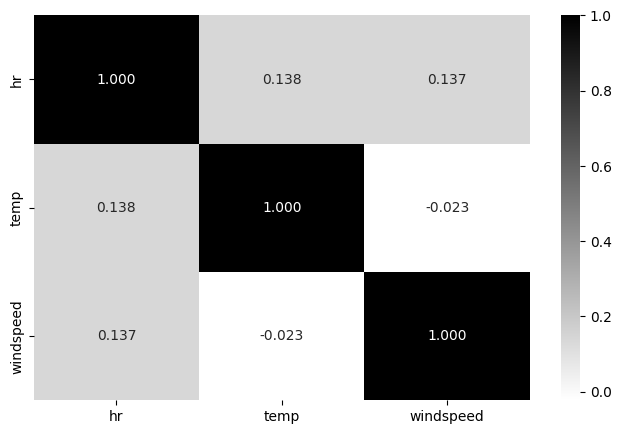

In [39]:
#Since we don't need an Axes
plt.figure(figsize = (8,5))
corr = hour[thevariables].corr()
sns.heatmap(corr, annot = True, cmap = 'binary' , fmt = ".3f", xticklabels = thevariables, yticklabels = thevariables)
plt.show()

The <b>Heatmap</b> shows the measure of the correlation between two variables. As the legend on the rightside indicates, A darker fill in the rectangle indicates that a particular correlation is higher and a lighter fill indicates that a particular correlation is lower. <br>
A heatmap of correlation matrix can provide an even quicker way to check for patterns and relationships among variables, since the strong relationships will quickly catch the eye. <br>

Understanding <b>Parameters</b>
cmap = It is the color map, choosing different cmaps can provide us different color schemes. (sns.heatmap() documentation). <br>
annot = If True, it writes the data value in each cell. Data Frames match on position, not index. <br> 
fmt = string formatting code used on the annotations (.3f) (Float numbers only show 3 decimal places). <br>


<b>HEATMAPS</b> can not just be drawn for correlation matrices but also <b>variables</b>. For example - We can draw a heatmap showing the number of riders at each hour throughout a week. ( Pivot Tables )

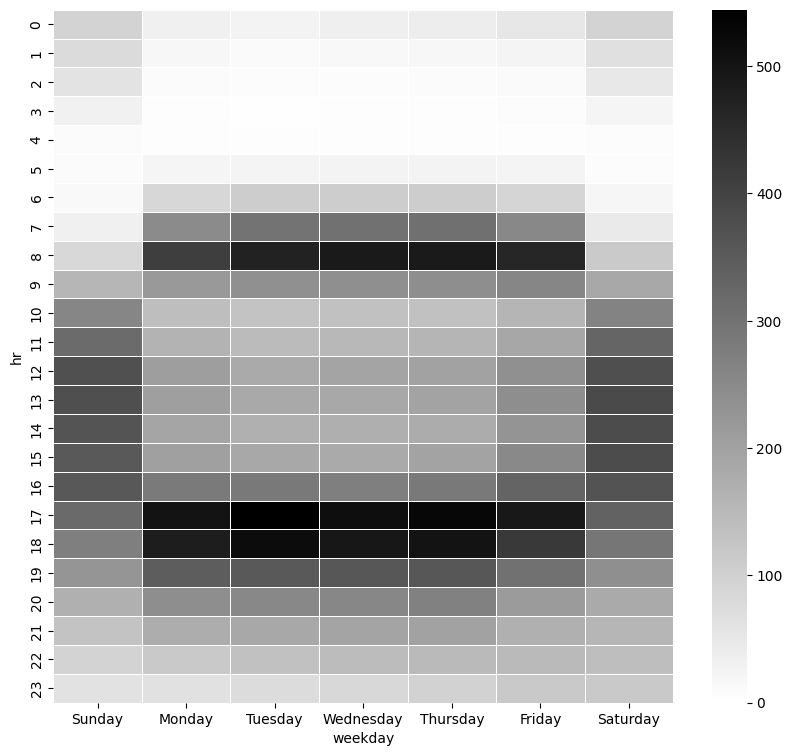

In [50]:
#Creating a Pivot Table - 
df_hm = hour.pivot_table(index = 'hr', columns = 'weekday', values = 'count')
# print(df_hm) -> How the pivot table looks 
#Drawing a Heatmap of this data - 
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.figure(figsize = (10,9)) #Resizing
sns.heatmap(df_hm, fmt = 'd',  cmap = 'binary',linewidths = .5 , vmin = 0, xticklabels = labels)
plt.show()

## Pivot Table
A pivot table is a table of grouped values. (check the code for the output). Here the pivot table has grouped values from the whole data set based on their day of the week, hour of the day. We have the average ridership for each hour (0-23) for each weekday (Sunday through saturday). Which is plotted on the heatmap. <br>

<b> Potential Interpretations </b>
Looking at this heatmap, one can clearly see the higher demand during commute hours on the weekdays and can apply the surgepricing strategy.

 # 5 Step Process 
0) - Importing and reading Data
1) - Data Understanding
2) - Data Preparation
3) - Feature Relationships
4) - Questions that need Answers